In [1]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import the Node class and the helper functions

from   Node_class        import *
from   root_class        import *
import helper_function   as hf

# Import necessary packages

import numpy             as np
import matplotlib.pyplot as plt
import h5py
import sys

/opt/anaconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/opt/anaconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.targets.imputils', please update to use 'numba.core.imputils' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.targets.imputils import impl_ret_borrowed, lower_constant
/opt/anaconda3/lib/python3.7/site-packages/sparse/_coo/numba_extension.py:18: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'impl_ret_borrowed' requested from: 'numba.targets.imputils', please update to use 'numba.core.imputils' or pin to 

In [3]:
from scipy.linalg import polar

In [4]:
from scipy.ndimage import center_of_mass
from skimage.transform import rotate

In [5]:
file_path = '/Volumes/LaCie/databackup/20230429_SnSe_heating/Flake1__1_9300x_300kv_spt8_rot_-14.2_conv0.50mrad_720mm/scan_x256_y256.raw'

In [6]:

data = hf.read_4D(file_path)


data = np.flip(data, axis = 2)

In [7]:
ferro_node = FileClass(data)

In [8]:
ferro_node.alignment()

 255,255          Mean of the center =  (64.00106225864386, 63.94706841839178)
Std of the center =  (0.010069670289836312, 0.013052129426170693)


In [9]:
adf_image = ferro_node.getADF()

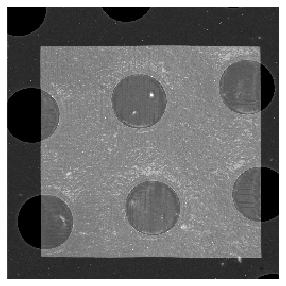

In [10]:
plt.figure(figsize=(5,5))
# plt.title('ADF image')
plt.imshow(adf_image, vmax = 2e6,cmap='gray')
plt.xticks(np.arange(0,255,10))
plt.yticks(np.arange(0,255,10))
# plt.colorbar()
plt.axis('off')
plt.grid()
plt.savefig("/Users/shichuqiao/Desktop/Rice Projects/Heating SnSe/image_before_annealing/adf_1_1.pdf", 
            format="pdf", bbox_inches="tight",
            transparent=True, pad_inches=0)
plt.show()

In [11]:
sample_diff = np.mean(np.mean(ferro_node.data[40:230,40:230,:,:],axis = 0),axis = 0)

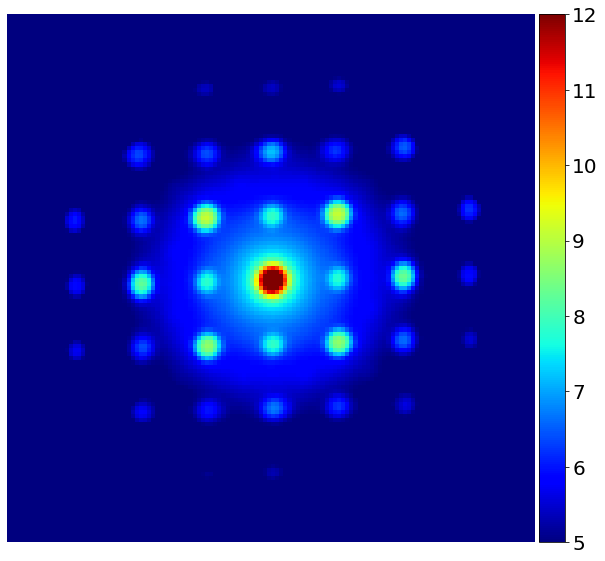

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow(rotate(np.log(sample_diff+1),-14.2),vmin = 5, vmax = 12, cmap='jet')
plt.xticks(np.arange(0,128,10))
plt.yticks(np.arange(0,128,10))

plt.axis('off')

plt.grid()
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
plt.show()

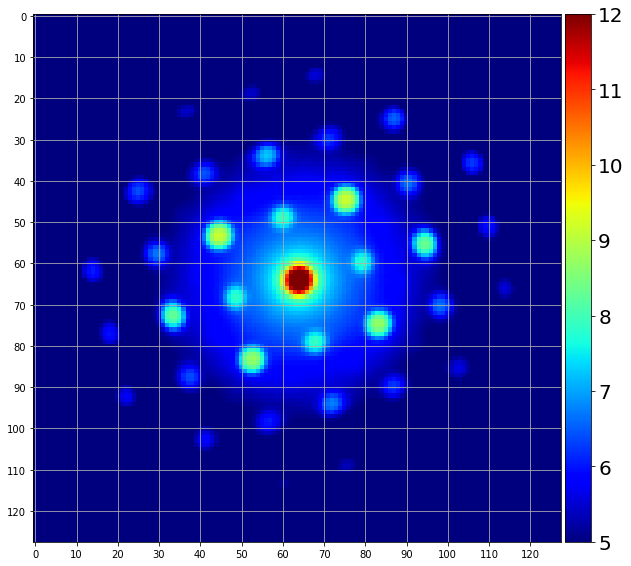

In [13]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow(np.log(sample_diff+1),vmin = 5, vmax = 12, cmap='jet')
plt.xticks(np.arange(0,128,10))
plt.yticks(np.arange(0,128,10))

# plt.axis('off')

plt.grid()
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
plt.show()

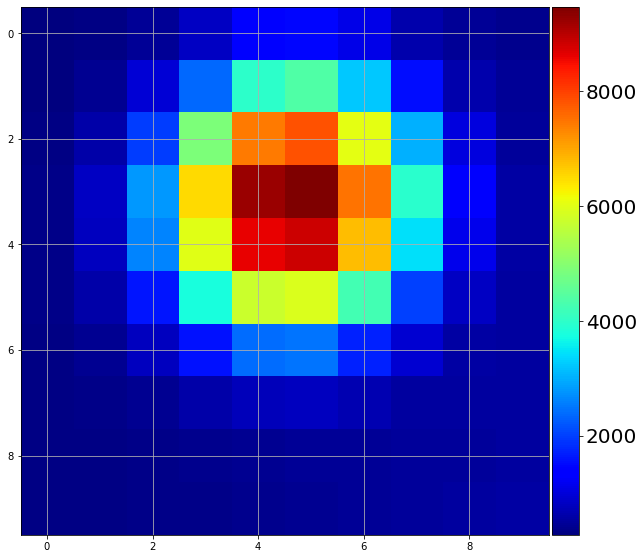

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow(sample_diff[50:60, 40:50], cmap='jet')
# plt.xticks(np.arange(0,128,10))
# plt.yticks(np.arange(0,128,10))

# plt.axis('off')

plt.grid()
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
plt.show()

In [15]:
center_200 = [(53,45),(83,53),(74.5,83),(44.5,75.5) ]

In [16]:
def make_mask(center, r):
    mask = np.zeros((128,128))
    x, y = center[0], center[1]
    for i in range(128):
        for j in range(128):
            if (i-x)**2 + (j-y)**2 <= r**2:
                mask[i][j] = 1
                
    return mask

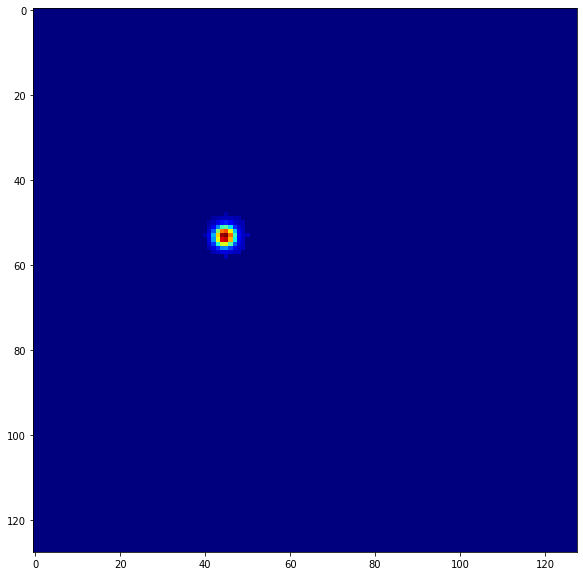

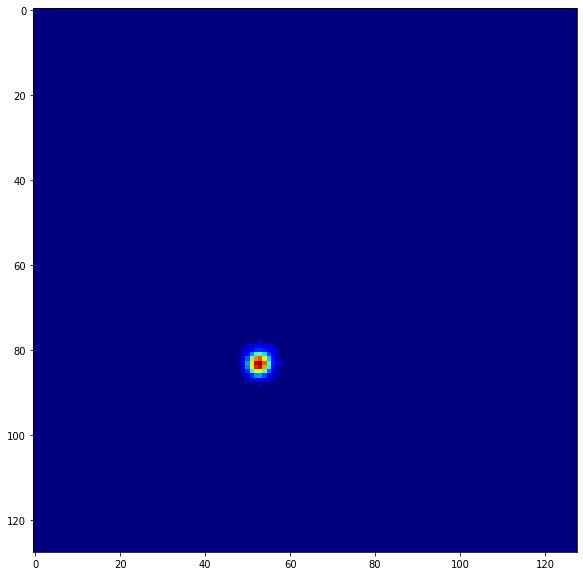

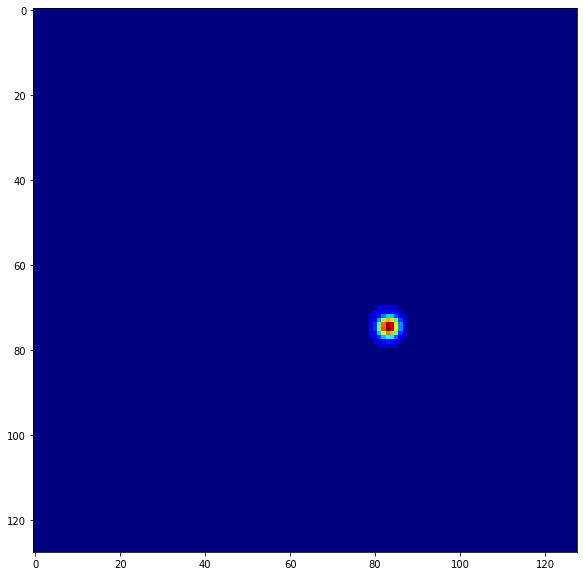

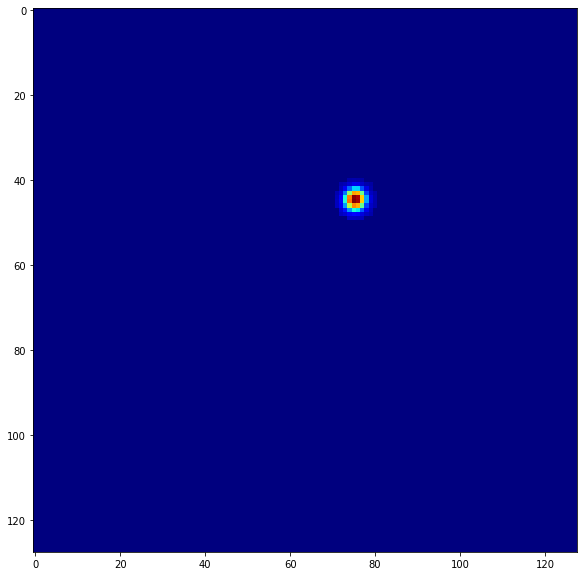

In [17]:
mask_list = []
for i in range(4):
    mask_list.append(make_mask(center_200[i],5))
    plt.figure(figsize=(10,10))

    im1 = plt.imshow(sample_diff*make_mask(center_200[i],5), cmap='jet')
    # plt.xticks(np.arange(0,128,10))
    # plt.yticks(np.arange(0,128,10))
    # # plt.yticks(np.arange(0, 60, step=10), size = 20)
    # plt.axis('off')

#     plt.grid()
#     ax = plt.gca()
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)

#     cb = plt.colorbar(im1, cax = cax)
#     cb.ax.tick_params(labelsize=20) 
    plt.show()

In [18]:
diff_pos = np.zeros((256,256,4,2))

for i in range(256):
    for j in range(256):
        for k in range(4):
            diff_pos[i][j][k] = center_of_mass(data[i][j] * mask_list[k])

In [19]:
g1 = diff_pos[:,:,0,:] - diff_pos[:,:,2,:] 
g2 = diff_pos[:,:,1,:] - diff_pos[:,:,3,:] 
g1_map = np.linalg.norm(g1, axis = -1)
g2_map = np.linalg.norm(g2, axis = -1)

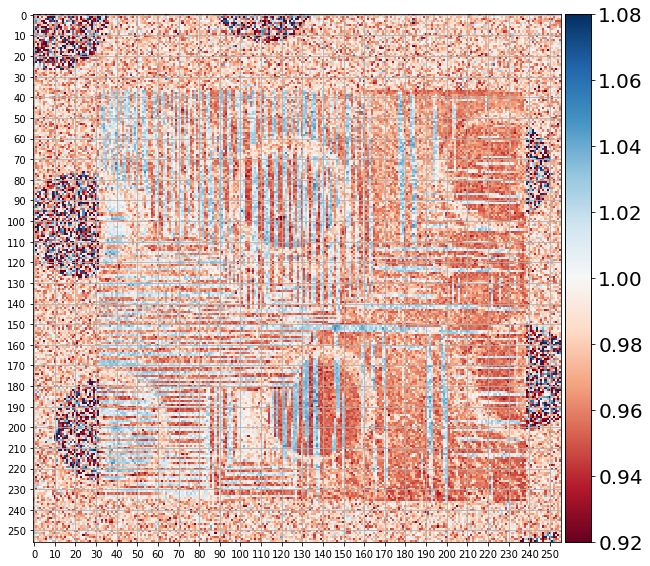

In [20]:

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow((g1_map/g2_map),vmin = 0.92, vmax = 1.08, cmap='RdBu')
plt.xticks(np.arange(0,255,10))
plt.yticks(np.arange(0,255,10))
# plt.colorbar()
plt.grid()
# plt.axis('off')

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im1, cax = cax)
cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
plt.show()

In [21]:
ferro_strain_map = g1_map/g2_map -1+0.015
ferro_strain_map[:34, :] = 0
ferro_strain_map[235:, :] = 0
ferro_strain_map[:, :30] = 0
ferro_strain_map[:, 240:] = 0

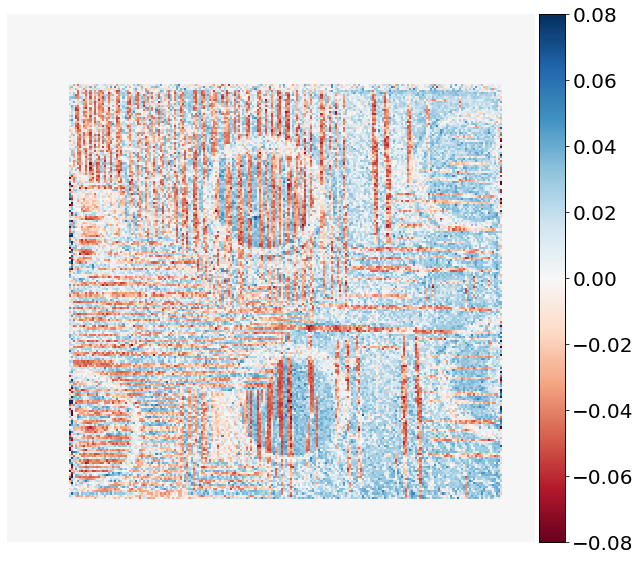

In [22]:

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow(-ferro_strain_map,vmin = 0.92-1, vmax = 1.08-1, cmap='RdBu')
plt.xticks(np.arange(0,255,10))
plt.yticks(np.arange(0,255,10))
# plt.colorbar()
plt.grid()
plt.axis('off')

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im1, cax = cax)
cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
plt.show()

In [23]:
mean_pos = np.mean(np.mean(diff_pos[40:230,40:230],axis = 0),axis = 0)

In [24]:
ref_g1 = mean_pos[0] - mean_pos[2]
ref_g2 = mean_pos[1] - mean_pos[3]

In [25]:
G_ref = np.array([[ref_g1[0], ref_g2[0]],
                  [ref_g1[1], ref_g2[1]]])


In [26]:
angle =61

R1 = np.array([[np.cos(angle/180*np.pi), np.sin(angle/180*np.pi)], 
              [-np.sin(angle/180*np.pi), np.cos(angle/180*np.pi)]])

In [27]:
R1@G_ref

array([[-43.68673016,  -0.94408276],
       [  0.21966956, -44.46658809]])

In [28]:
exx1   = np.zeros((256,256))
eyy1   = np.zeros((256,256))
exy1   = np.zeros((256,256))
eyx1   = np.zeros((256,256))
theta1 = np.zeros((256,256))


In [29]:
for i in range(len(g1)):
    for j in range(len(g1)):
        G1 = np.array([[g1[i][j][0], g2[i][j][0]],
                      [g1[i][j][1], g2[i][j][1]]])
        T = R1@G1@np.linalg.inv(G_ref)@np.linalg.inv(R1)
    #     u,p = scipy.linalg.polar(T)
    #     print(u)


        R, U = polar(T)


        exx1[i][j] = 1-U[0,0]
        eyy1[i][j] = 1-U[1,1]
        exy1[i][j] = U[1,0]
    #     eyx[i] = 1 - U[0,1]
        theta1[i][j] = np.arccos(R[0,1])

    

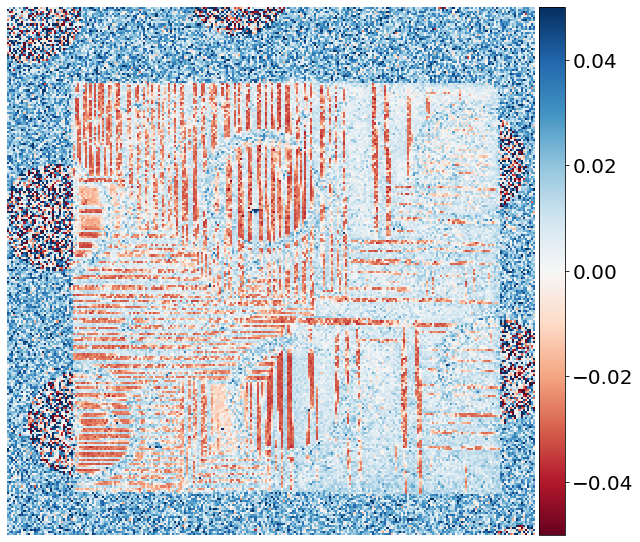

In [30]:
# Plot the ADF images 
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow(exx1, vmin = -0.05, vmax = 0.05,cmap='RdBu')
plt.xticks(np.arange(0,255,10))
plt.yticks(np.arange(0,255,10))
# plt.yticks(np.arange(0, 60, step=10), size = 20)
plt.axis('off')
# plt.grid()
# 
# plt.xlabel('Theta',size = 30)
# plt.ylabel('R',size = 30)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
 
plt.show()

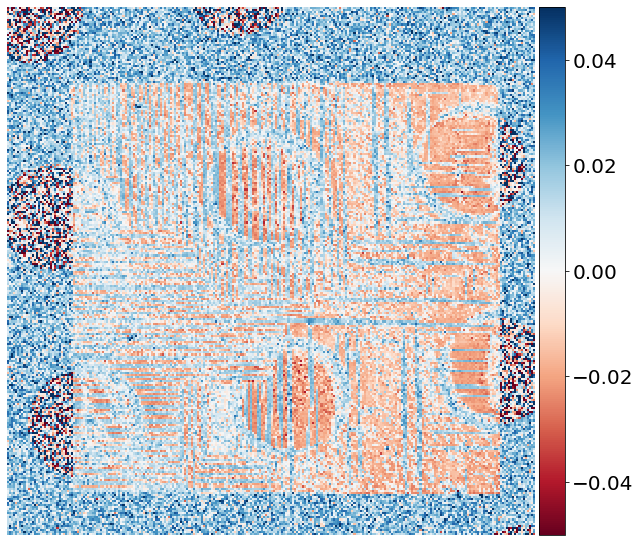

In [31]:
# Plot the ADF images 
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow(eyy1, vmin = -0.05, vmax = 0.05,cmap='RdBu')
plt.xticks(np.arange(0,255,10))
plt.yticks(np.arange(0,255,10))
# plt.yticks(np.arange(0, 60, step=10), size = 20)
plt.axis('off')
# plt.grid()
# 
plt.xlabel('Theta',size = 30)
plt.ylabel('R',size = 30)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
 
plt.show()

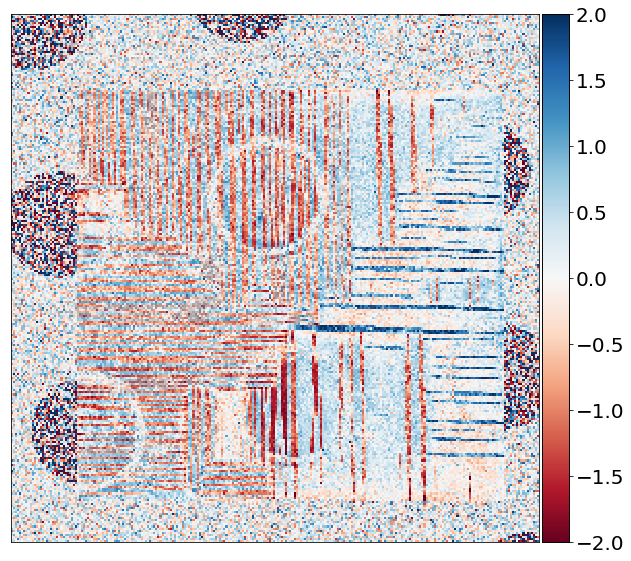

In [32]:
# Plot the ADF images 
theta_degree = theta1 /np.pi * 180
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow(-np.reshape(theta_degree-90,(256,256)),vmin = -2, vmax = 2, cmap='RdBu')
plt.xticks([]),plt.yticks([])
# plt.yticks(np.arange(0, 60, step=10), size = 20)
# plt.grid()
# plt.xlabel('Theta',size = 30)
# plt.ylabel('R',size = 30)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im1, cax = cax)
cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
plt.show()

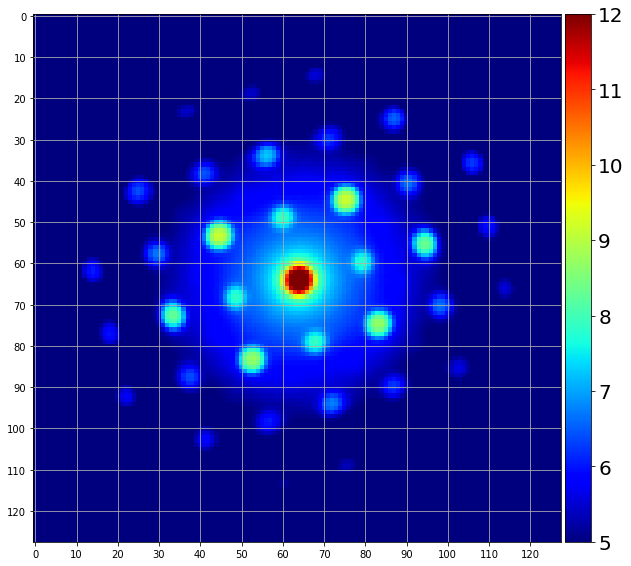

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow(np.log(sample_diff+1),vmin = 5, vmax = 12, cmap='jet')
plt.xticks(np.arange(0,128,10))
plt.yticks(np.arange(0,128,10))

# plt.axis('off')

plt.grid()
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
plt.show()

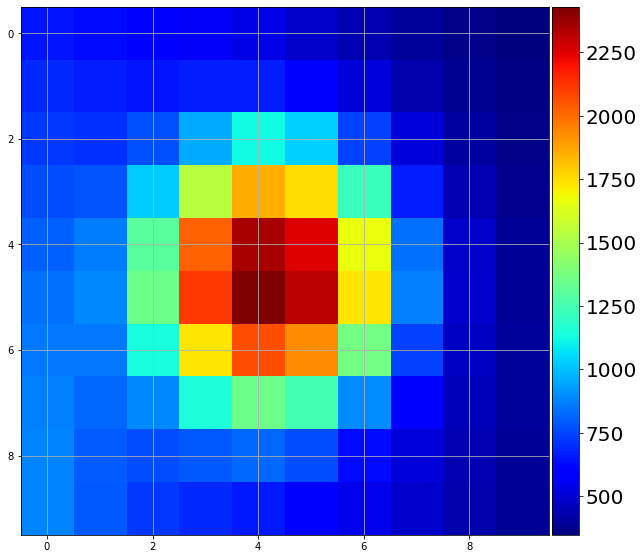

In [34]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow(sample_diff[55:65,75:85] ,cmap='jet')
# plt.xticks(np.arange(0,128,10))
# plt.yticks(np.arange(0,128,10))

# plt.axis('off')

plt.grid()
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
plt.show()

In [35]:
center_110 = np.array([[49,60],[68,49],[79,68],[60,79] ])

In [36]:
def make_mask(center, r):
    mask = np.zeros((128,128))
    x, y = center[0], center[1]
    for i in range(128):
        for j in range(128):
            if (i-x)**2 + (j-y)**2 <= r**2:
                mask[i][j] = 1
                
    return mask

In [37]:
mask_list = []
for i in range(4):
    mask_list.append(make_mask(center_110[i],4))

In [38]:
diff_pos = np.zeros((256,256,4,2))

for i in range(256):
    for j in range(256):
        for k in range(4):
            diff_pos[i][j][k] = center_of_mass(data[i][j] * mask_list[k])

In [39]:
center_110_list = np.mean(np.mean(diff_pos, axis = 0),axis = 0)

In [40]:
center_bkg_list = np.array([(center_110_list[0] + center_110_list[1])/2,
                       (center_110_list[1] + center_110_list[2])/2,
                       (center_110_list[2] + center_110_list[3])/2,
                       (center_110_list[3] + center_110_list[0])/2])

center_bkg_list

array([[58.25217066, 54.64296834],
       [72.97923495, 58.55927587],
       [68.99954314, 73.3577241 ],
       [54.27247886, 69.44141658]])

In [41]:
mask_110 = np.zeros((4, 128,128))
for k, center in enumerate(center_110_list):
    for i in range(128):
        for j in range(128):
            if (i-center[0]) ** 2 + (j-center[1]) ** 2 <= 4 **2:
                mask_110[k][i][j] = 1

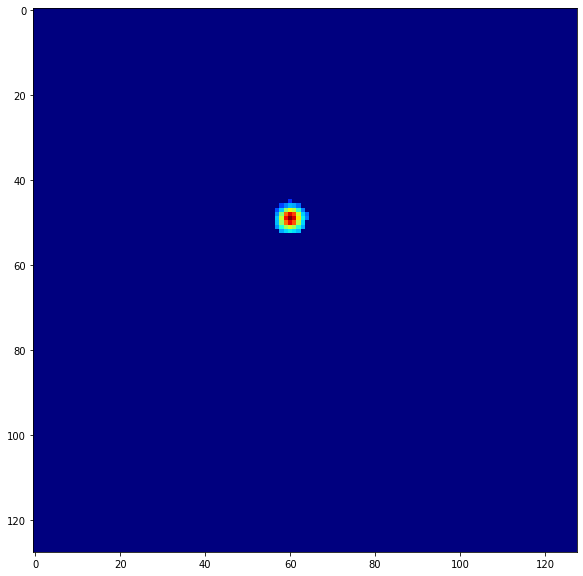

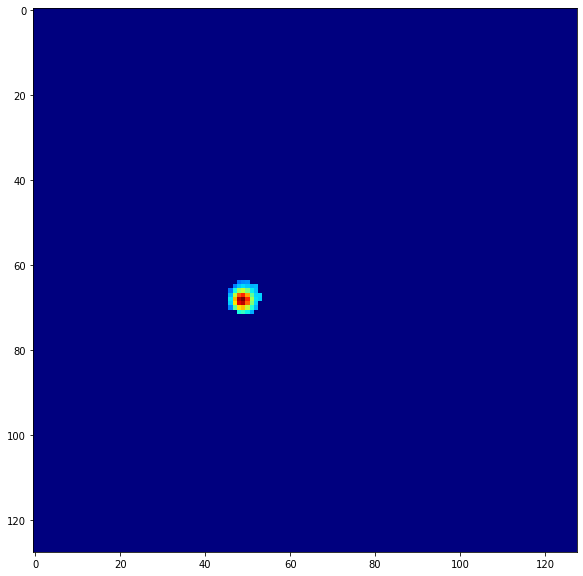

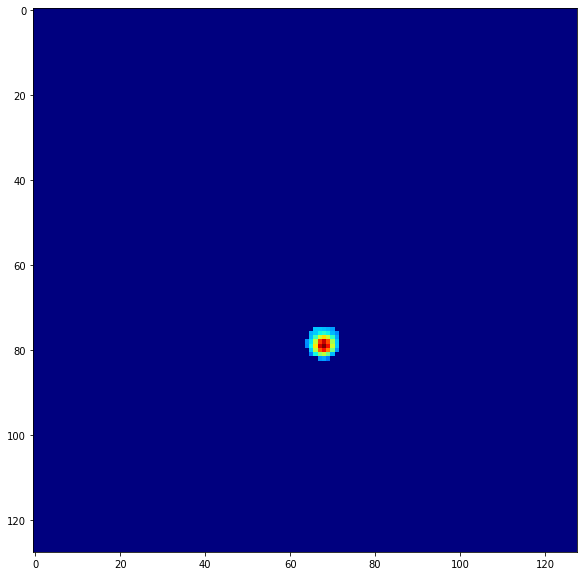

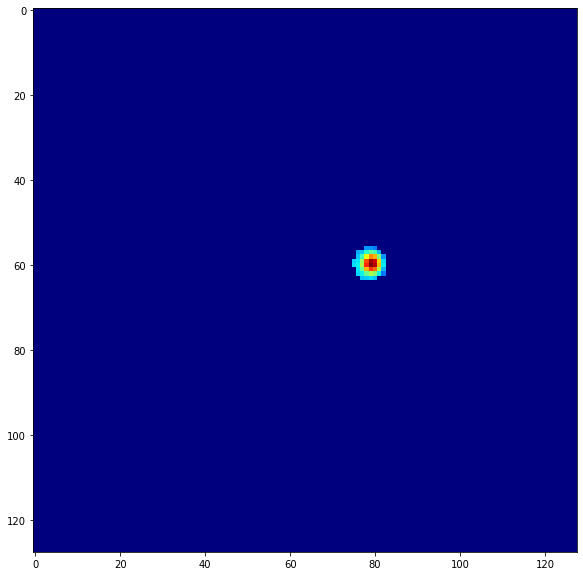

In [42]:

for i in range(4):
 
    plt.figure(figsize=(10,10))

    im1 = plt.imshow(sample_diff*mask_110[i], cmap='jet')
    plt.show()

In [43]:
intensity_110 = np.zeros((4, 256,256))
for k in range(4):
    for i in range(256):
        for j in range(256):
            intensity_110[k][i][j] = np.sum(data[i][j] * mask_110[k])

In [44]:
mask_bkg = np.zeros((4, 128,128))
for k, center in enumerate(center_bkg_list):
    for i in range(128):
        for j in range(128):
            if (i-center[0]) ** 2 + (j-center[1]) ** 2 <= 4 **2:
                mask_bkg[k][i][j] = 1

In [45]:
center_bkg_list

array([[58.25217066, 54.64296834],
       [72.97923495, 58.55927587],
       [68.99954314, 73.3577241 ],
       [54.27247886, 69.44141658]])

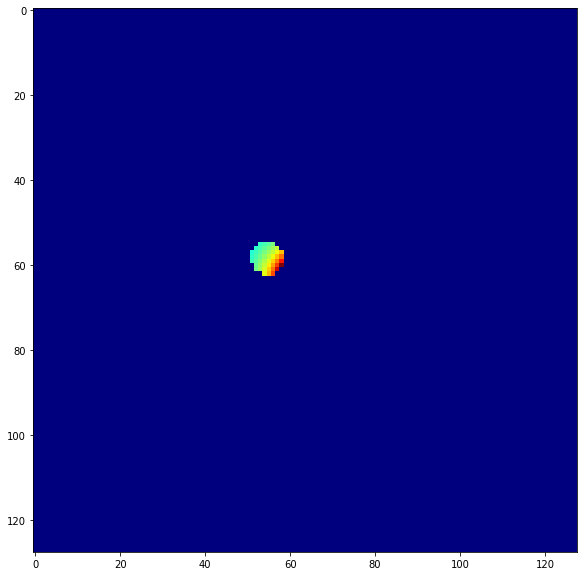

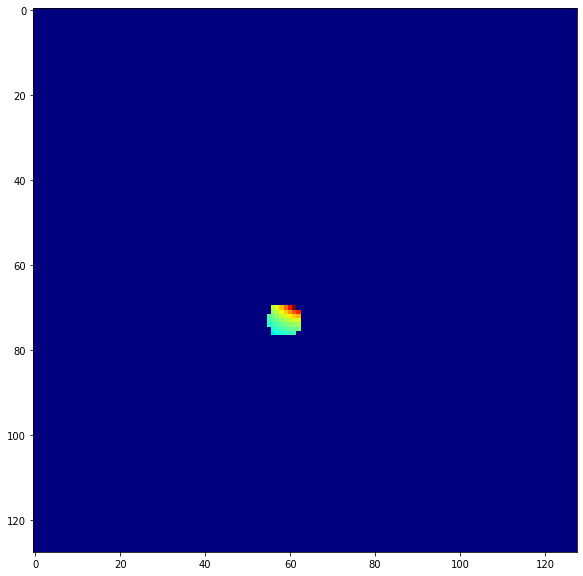

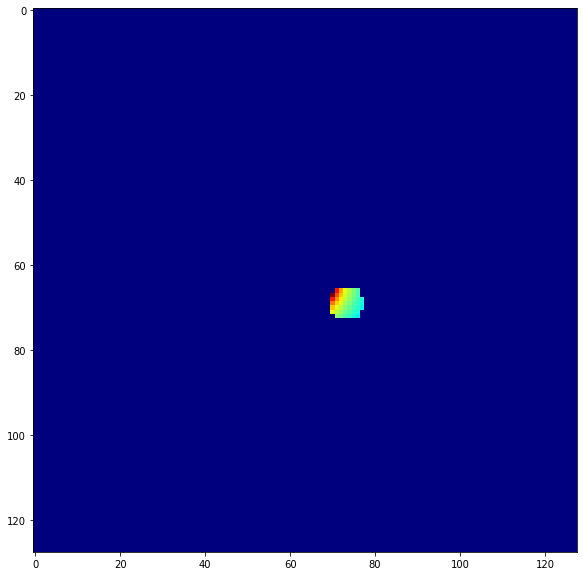

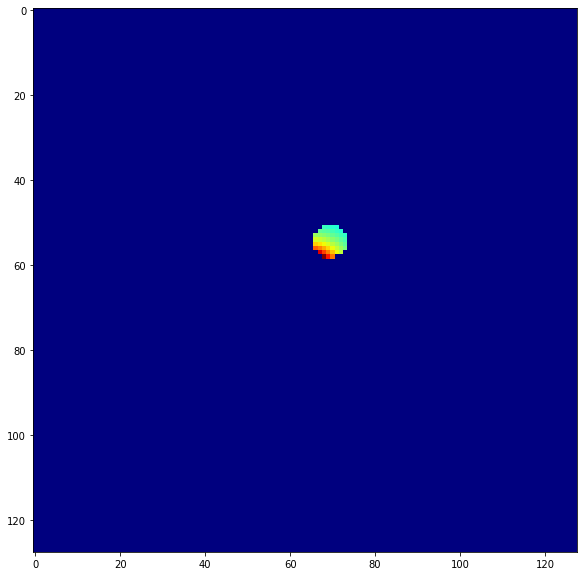

In [46]:

for i in range(4):
 
    plt.figure(figsize=(10,10))

    im1 = plt.imshow(sample_diff*mask_bkg[i], cmap='jet')
    plt.show()

In [47]:
intensity_bkg = np.zeros((4, 256,256))
for k in range(4):
    for i in range(256):
        for j in range(256):
            intensity_bkg[k][i][j] = np.sum(data[i][j] * mask_bkg[k])

In [48]:
intensity_all = np.sum(np.sum(data, axis = -1),axis = -1)

In [49]:
stacking_map = (np.sum(intensity_110,axis = 0) - 0.5* np.sum(intensity_bkg,axis = 0)) /intensity_all

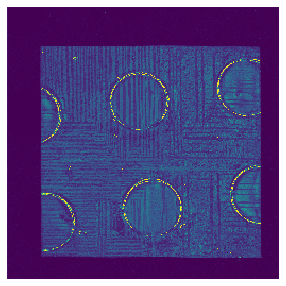

In [50]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(5,5))

im1 = plt.imshow(stacking_map, vmin = 0,vmax = 0.05, cmap='viridis')
plt.xticks(np.arange(0,255,10))
plt.yticks(np.arange(0,255,10))
# # plt.yticks(np.arange(0, 60, step=10), size = 20)
plt.axis('off')

plt.grid()
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

# cb = plt.colorbar(im1, cax = cax)
# cb.ax.tick_params(labelsize=20) 
plt.savefig("/Users/shichuqiao/Desktop/Rice Projects/Heating SnSe/image_before_annealing/stacking_1_1.pdf", 
            format="pdf", bbox_inches="tight",
           transparent=True, pad_inches=0)
plt.show()

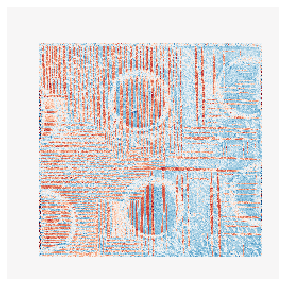

In [51]:

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(5,5))

im1 = plt.imshow(-ferro_strain_map,vmin = 0.92-1, vmax = 1.08-1, cmap='RdBu')
plt.xticks(np.arange(0,255,10))
plt.yticks(np.arange(0,255,10))
# plt.colorbar()
plt.grid()
plt.axis('off')

# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

# plt.colorbar(im1, cax = cax)
# cb = plt.colorbar(im1, cax = cax)
# cb.ax.tick_params(labelsize=20) 
plt.savefig("/Users/shichuqiao/Desktop/Rice Projects/Heating SnSe/image_before_annealing/ferro_strain_1_1.pdf", 
            format="pdf", bbox_inches="tight",
           transparent=True, pad_inches=0)
plt.show()

In [52]:
angle_map = -np.reshape(theta_degree-90,(256,256))

In [53]:
angle_map[:34, :] = 0
angle_map[235:, :] = 0
angle_map[:, :30] = 0
angle_map[:, 240:] = 0

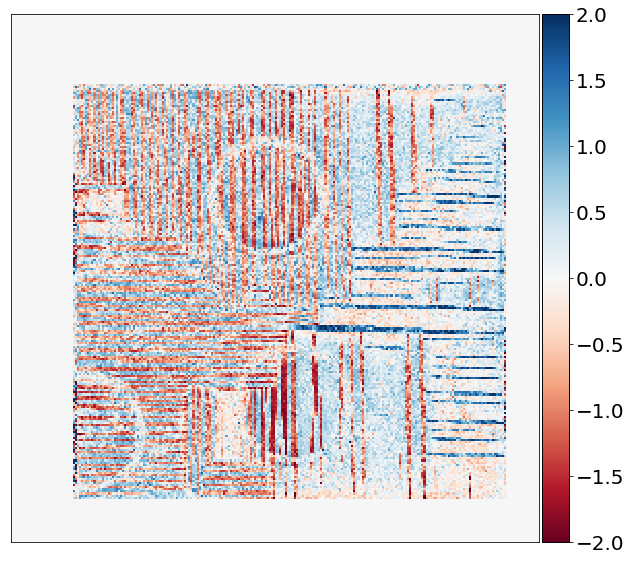

In [54]:
# Plot the ADF images 
theta_degree = theta1 /np.pi * 180
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow(angle_map,vmin = -2, vmax = 2, cmap='RdBu')
plt.xticks([]),plt.yticks([])
# plt.yticks(np.arange(0, 60, step=10), size = 20)
# plt.grid()
# plt.xlabel('Theta',size = 30)
# plt.ylabel('R',size = 30)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im1, cax = cax)
cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
plt.show()

In [55]:
rot_map1 = angle_map.copy()
rot_map2 = angle_map.copy()

In [56]:
sel = -ferro_strain_map > 0
rot_map1[sel] = 0
sel = -ferro_strain_map < 0
rot_map2[sel] = 0

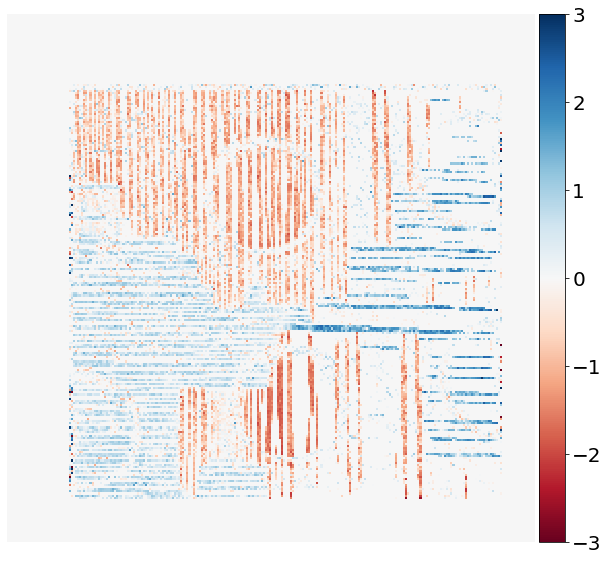

In [57]:
# Plot the ADF images 
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow( rot_map1,vmin=-3, vmax=3, cmap='RdBu',)

# plt.xticks(np.arange(0,255,10))
# plt.yticks(np.arange(0,255,10))
# # plt.yticks(np.arange(0, 60, step=10), size = 20)
plt.axis('off')

plt.grid()
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
plt.show()

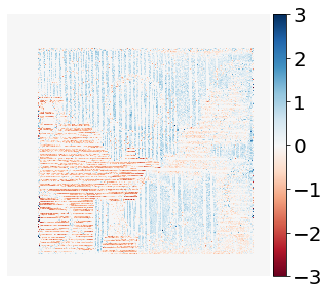

In [58]:
# Plot the ADF images 
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(5,5))

im1 = plt.imshow( rot_map2,vmin=-3, vmax=3, cmap='RdBu',)

# plt.xticks(np.arange(0,255,10))
# plt.yticks(np.arange(0,255,10))
# # plt.yticks(np.arange(0, 60, step=10), size = 20)
plt.axis('off')

plt.grid()
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

cb = plt.colorbar(im1, cax = cax)
cb.ax.tick_params(labelsize=20) 
plt.show()

In [59]:
plt.imsave('/Users/shichuqiao/Desktop/Rice Projects/Heating SnSe/image_before_annealing/not_use/rot1_1_1.png', rot_map1,vmin=-3, vmax=3, cmap='RdBu')
plt.imsave('/Users/shichuqiao/Desktop/Rice Projects/Heating SnSe/image_before_annealing/not_use/rot2_1_1.png',rot_map2,vmin=-3, vmax=3, cmap='PRGn')

In [60]:
rot_1 = plt.imread('/Users/shichuqiao/Desktop/Rice Projects/Heating SnSe/image_before_annealing/not_use/rot1_1_1.png')
sel = -ferro_strain_map > 0
rot_1[sel,3] = 0
rot_2 = plt.imread('/Users/shichuqiao/Desktop/Rice Projects/Heating SnSe/image_before_annealing/not_use/rot2_1_1.png')
sel = -ferro_strain_map < 0
rot_2[sel,3] = 0

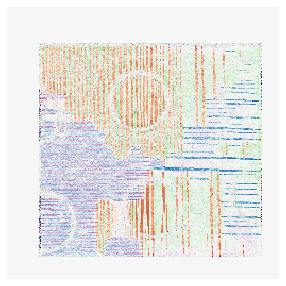

In [61]:
# Plot the ADF images 
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(5,5))

im1 = plt.imshow( rot_1)
im2 = plt.imshow(rot_2)
# im1 = plt.imshow( rot_1)
plt.xticks([])
plt.yticks([])
# # plt.yticks(np.arange(0, 60, step=10), size = 20)
plt.axis('off')

# plt.grid()
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

# cb = plt.colorbar(im1, cax = cax)
# cb.ax.tick_params(labelsize=20)
plt.savefig("/Users/shichuqiao/Desktop/Rice Projects/Heating SnSe/image_before_annealing/rotation_1_1.pdf", 
            format="pdf", bbox_inches="tight",
           transparent=True, pad_inches=0)
plt.show()

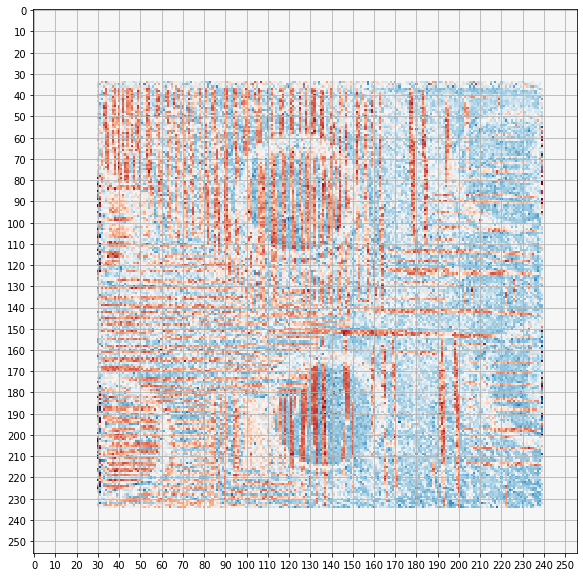

In [68]:

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure(figsize=(10,10))

im1 = plt.imshow(-ferro_strain_map,vmin = 0.92-1, vmax = 1.08-1, cmap='RdBu')
plt.xticks(np.arange(0,255,10))
plt.yticks(np.arange(0,255,10))
# plt.colorbar()
plt.grid()
# plt.axis('off')

# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)

# plt.colorbar(im1, cax = cax)
# cb = plt.colorbar(im1, cax = cax)
# cb.ax.tick_params(labelsize=20) 
# plt.savefig("/Users/shichuqiao/Desktop/Rice Projects/Heating SnSe/image_before_annealing/ferro_strain_1_1.pdf", 
#             format="pdf", bbox_inches="tight",
#            transparent=True, pad_inches=0)
plt.show()

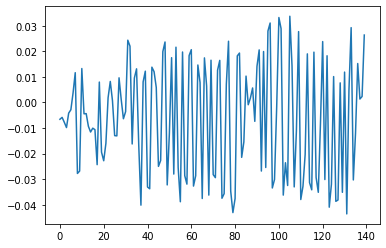

In [69]:
plt.plot(np.mean(-ferro_strain_map[90:230,40:50],axis =1))
plt.show()

In [66]:
np.random.randn(50)+50

array([49.81166631, 49.20886285, 49.4279985 , 53.01510589, 50.72227556,
       49.72667149, 49.94886642, 49.36064395, 50.14101819, 50.13383532,
       50.63380737, 51.00972303, 50.52877125, 48.97632553, 51.24215098,
       50.1522868 , 49.75322672, 49.99730884, 50.00375555, 50.73498566,
       49.52286153, 49.56468215, 49.34929506, 49.05904162, 50.5175962 ,
       50.86561362, 49.35704255, 49.58036512, 50.80042637, 49.13417393,
       51.12217782, 49.06333553, 49.11577748, 49.82522332, 50.46348358,
       51.0578806 , 47.91273625, 50.37759284, 48.52867165, 48.16403644,
       51.41090299, 50.66620261, 49.01746056, 51.06506384, 50.979326  ,
       50.00481988, 48.91056113, 50.06695468, 51.15615797, 48.81985276])

In [62]:
rot_map1 = angle_map.copy()
rot_map2 = angle_map.copy()

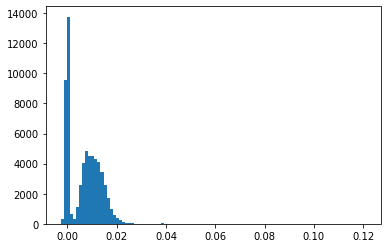

In [63]:
plt.hist(stacking_map.flatten(), bins = 100)
plt.show()